### Project Objectives:
- In this project I aim to predict the type of clothing item using neural network model in Keras
- Author: Carlos Caballero - Data Scientist
- Dataset: Fashion MNIST
- Models: Multilayer Perceptron (MLP), with stochastic gradient descent (SGD), and softmax as activation function
- Method: Fit images and evaluate performance

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn
import csv
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Examine shape of data
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# Create evaluatio set and scale input features since using Gradient Descent to train the neural network
# Scale pixel intensities down to 0-1 range by dividing them by 255.0
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# List class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Look at first record of training data
class_names[y_train[0]]

'Coat'

### Create Model/Neural Network

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), # performs simple preprocessing X.shape(-1,1)
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Using TensorFlow backend.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Verify model layers
model.layers

In [12]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd', #stochastic gradient descent, default learning rate = 0.01
             metrics=['accuracy'])

In [14]:
# Fit the model
history = model.fit(X_train, y_train, epochs=30,
                   validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.7213 - accuracy: 0.7652 - val_loss: 0.5123 - val_accuracy: 0.8218
Epoch 2/30
55000/55000 [==============================] - 2s 39us/sample - loss: 0.4869 - accuracy: 0.8300 - val_loss: 0.4599 - val_accuracy: 0.8458
Epoch 3/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4442 - accuracy: 0.8446 - val_loss: 0.4160 - val_accuracy: 0.8586
Epoch 4/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4162 - accuracy: 0.8529 - val_loss: 0.3943 - val_accuracy: 0.8646
Epoch 5/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.3955 - accuracy: 0.8604 - val_loss: 0.3877 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.3787 - accuracy: 0.8661 - val_loss: 0.3742 - val_accuracy: 0.8686
Epoch 7/30
55000/55000 [==============================] -

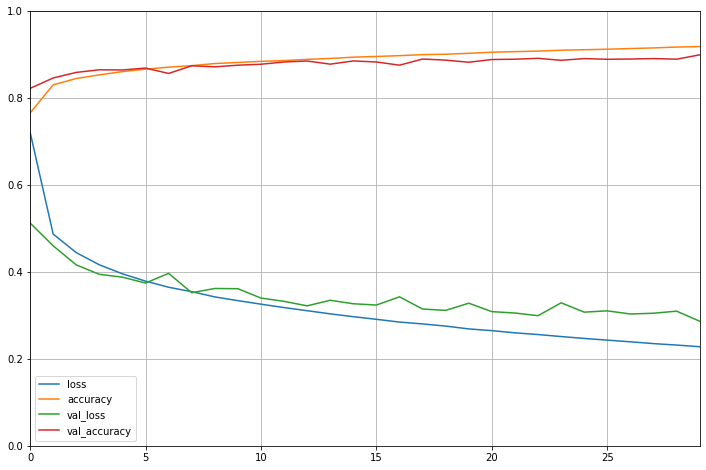

In [17]:
# Visualize model
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

In [18]:
# Evaluate model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 65.2312 - accuracy: 0.8501


[65.23121768860332, 0.8501]

In [20]:
# Make predictions on 3 new instances
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# Get class with highest estimated probability only
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [22]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [23]:
# See if classifier classified all 3 images correctly
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### The model performed extremely well classifying the 3 new instances correctly.  
- Training accuracy = 92%
- Evaluation accuracy = 90%